In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('/kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv')

/tmp/ipykernel_55/2474584117.py:1: DtypeWarning: Columns (0,18,32,49,56,69,88,100,107,113,139,184,195,201,202,253,266,278,283,285,286,287,288,289,290,291,292,301,322,339,347,355,367) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv')


In [5]:
df.tail()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
25969,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25970,253,22-24,Man,China,Master’s degree,Student,1-3 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25971,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25972,277,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25973,255,18-21,Man,India,Bachelor’s degree,Business Analyst,I have never written code,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(25974, 369)

In [7]:
df=df.drop(0)

In [8]:
df.columns

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3',
       ...
       'Q38_B_Part_3', 'Q38_B_Part_4', 'Q38_B_Part_5', 'Q38_B_Part_6',
       'Q38_B_Part_7', 'Q38_B_Part_8', 'Q38_B_Part_9', 'Q38_B_Part_10',
       'Q38_B_Part_11', 'Q38_B_OTHER'],
      dtype='object', length=369)

In [9]:
for col in df.columns:
    if df[col].str.isnumeric().all():
        df[col] = pd.to_numeric(df[col])
        

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25973 entries, 1 to 25973
Columns: 369 entries, Time from Start to Finish (seconds) to Q38_B_OTHER
dtypes: float64(30), int64(1), object(338)
memory usage: 73.1+ MB


In [11]:
df['Q3'].unique()

array(['India', 'Indonesia', 'Pakistan', 'Mexico', 'Russia', 'Turkey',
       'Australia', 'Nigeria', 'Greece', 'Belgium', 'Japan', 'Egypt',
       'Singapore', 'Brazil', 'Poland', 'China',
       'Iran, Islamic Republic of...', 'United States of America',
       'Italy', 'Viet Nam', 'Israel', 'Peru', 'South Africa', 'Other',
       'Spain', 'Bangladesh',
       'United Kingdom of Great Britain and Northern Ireland', 'France',
       'Switzerland', 'Algeria', 'Tunisia', 'Argentina', 'Sweden',
       'Colombia', 'I do not wish to disclose my location', 'Canada',
       'Chile', 'Netherlands', 'Ukraine', 'Saudi Arabia', 'Romania',
       'Morocco', 'Austria', 'Taiwan', 'Kenya', 'Belarus', 'Ireland',
       'Portugal', 'Hong Kong (S.A.R.)', 'Denmark', 'Germany',
       'South Korea', 'Philippines', 'Sri Lanka', 'United Arab Emirates',
       'Uganda', 'Ghana', 'Malaysia', 'Thailand', 'Nepal', 'Kazakhstan',
       'Ethiopia', 'Iraq', 'Ecuador', 'Norway', 'Czech Republic'],
      dtype=obje

In [12]:
countries_str = "Algeria, Bahrain, Comoros, Djibouti, Egypt, Iraq, Jordan, Kuwait, Lebanon, Libya, Mauritania, Morocco, Oman, Palestine, Qatar, Saudi Arabia, Somalia, Sudan, Syria, Tunisia, United Arab Emirates, Yemen"

In [13]:
arab_countries = countries_str.split(", ")

In [14]:
df_arabs = df[df['Q3'].isin(arab_countries)]

In [15]:
df_arabs

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
20,650,30-34,Man,Egypt,Bachelor’s degree,Other,< 1 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,744,30-34,Woman,Egypt,Bachelor’s degree,Data Analyst,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,244,25-29,Woman,Egypt,Master’s degree,Currently not employed,< 1 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,453,18-21,Woman,Egypt,Bachelor’s degree,Student,1-3 years,Python,R,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,MLflow,NaN,NaN
85,161,25-29,Man,Algeria,Professional doctorate,Student,I have never written code,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25707,839,18-21,Man,United Arab Emirates,Bachelor’s degree,Student,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25807,733,22-24,Woman,Egypt,Master’s degree,Software Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25831,744,18-21,Woman,Egypt,Bachelor’s degree,Student,< 1 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25875,534,22-24,Man,Egypt,Some college/university study without earning ...,Student,3-5 years,Python,NaN,NaN,...,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,ClearML,Domino Model Monitor,MLflow,NaN,NaN


In [16]:
df_arabs['Q3'].unique()

array(['Egypt', 'Algeria', 'Tunisia', 'Saudi Arabia', 'Morocco',
       'United Arab Emirates', 'Iraq'], dtype=object)

In [17]:
dis = df_arabs['Q1'].value_counts().sort_index()
dis


Q1
18-21    179
22-24    250
25-29    190
30-34    130
35-39    109
40-44     74
45-49     45
50-54     23
55-59      8
60-69     10
Name: count, dtype: int64

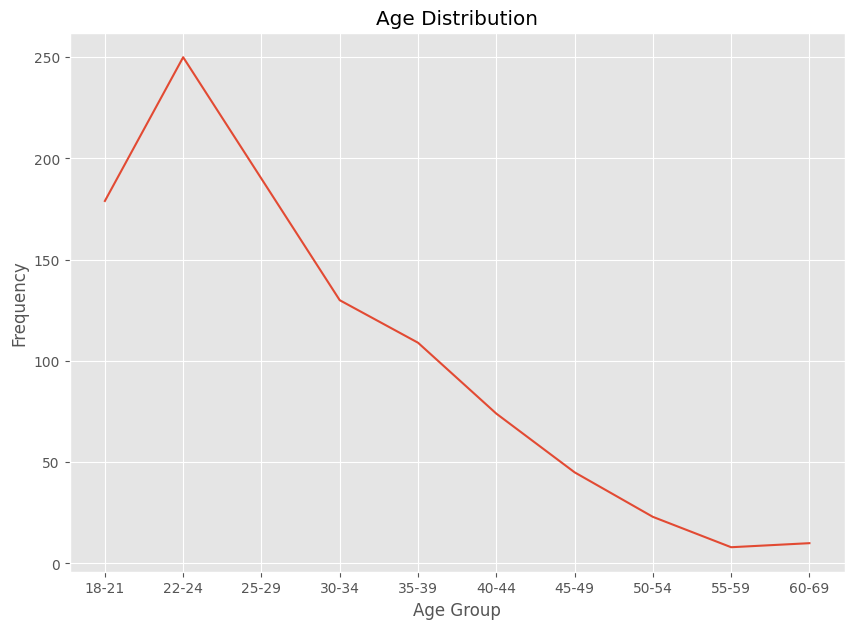

In [18]:
plt.style.use('ggplot')
plt.figure(figsize=(10,7)) 
x = dis.index
y = dis.values
plt.title("Age Distribution")
plt.xlabel("Age Group")
plt.ylabel("Frequency")

plt.plot(x,y)
plt.show()

In [19]:
df_arabs

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
20,650,30-34,Man,Egypt,Bachelor’s degree,Other,< 1 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,744,30-34,Woman,Egypt,Bachelor’s degree,Data Analyst,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,244,25-29,Woman,Egypt,Master’s degree,Currently not employed,< 1 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,453,18-21,Woman,Egypt,Bachelor’s degree,Student,1-3 years,Python,R,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,MLflow,NaN,NaN
85,161,25-29,Man,Algeria,Professional doctorate,Student,I have never written code,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25707,839,18-21,Man,United Arab Emirates,Bachelor’s degree,Student,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25807,733,22-24,Woman,Egypt,Master’s degree,Software Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25831,744,18-21,Woman,Egypt,Bachelor’s degree,Student,< 1 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25875,534,22-24,Man,Egypt,Some college/university study without earning ...,Student,3-5 years,Python,NaN,NaN,...,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,ClearML,Domino Model Monitor,MLflow,NaN,NaN


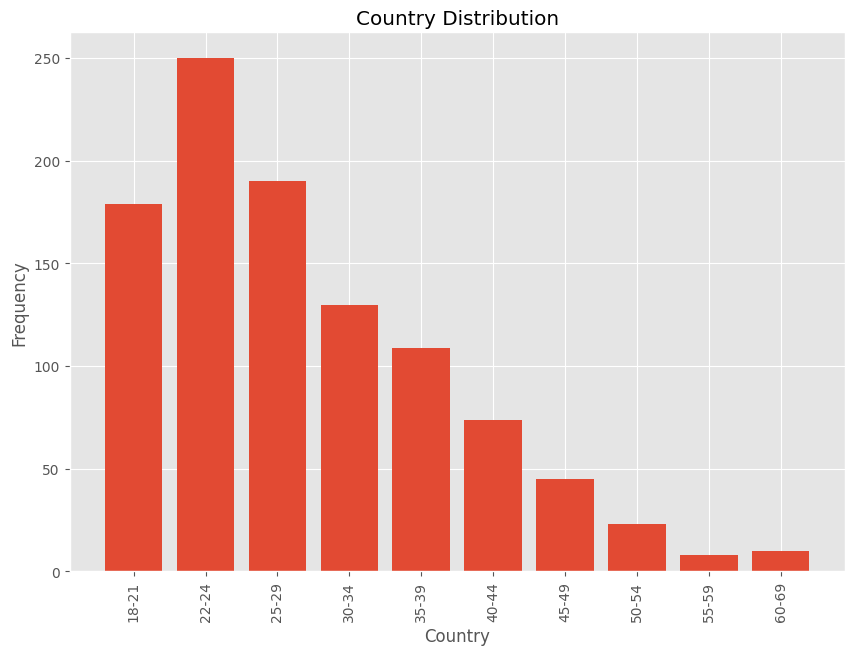

In [20]:
plt.figure(figsize=(10,7))
plt.title("Country Distribution")
plt.xlabel("Country")
plt.ylabel("Frequency")

x = dis.index
y = dis.values
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [21]:
 q7_columns = df_arabs.columns[df.columns.str.contains('Q7')]
q7_columns

Index(['Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5',
       'Q7_Part_6', 'Q7_Part_7', 'Q7_Part_8', 'Q7_Part_9', 'Q7_Part_10',
       'Q7_Part_11', 'Q7_Part_12', 'Q7_OTHER'],
      dtype='object')

In [22]:
df_arabs[q7_columns]

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25707,Python,NaN,NaN,C,C++,NaN,Javascript,NaN,NaN,Bash,NaN,NaN,NaN
25807,Python,R,SQL,C,C++,Java,Javascript,NaN,NaN,Bash,MATLAB,NaN,NaN
25831,Python,NaN,SQL,NaN,NaN,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25875,Python,NaN,NaN,NaN,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
dic_7 = dict()

In [62]:
for col in q7_columns:
    counts = df[col].value_counts()

    if not counts.empty:
        key = counts.index[0]
        dic_7[key] = counts.iloc[0]

In [63]:
dic_7

{'Python': np.int64(21860),
 'R': np.int64(5334),
 'SQL': np.int64(10756),
 'C': np.int64(4709),
 'C++': np.int64(5535),
 'Java': np.int64(4769),
 'Javascript': np.int64(4332),
 'Julia': np.int64(305),
 'Swift': np.int64(242),
 'Bash': np.int64(2216),
 'MATLAB': np.int64(2935),
 'Other': np.int64(2575)}

In [56]:
q7_series = pd.Series(dic_7)

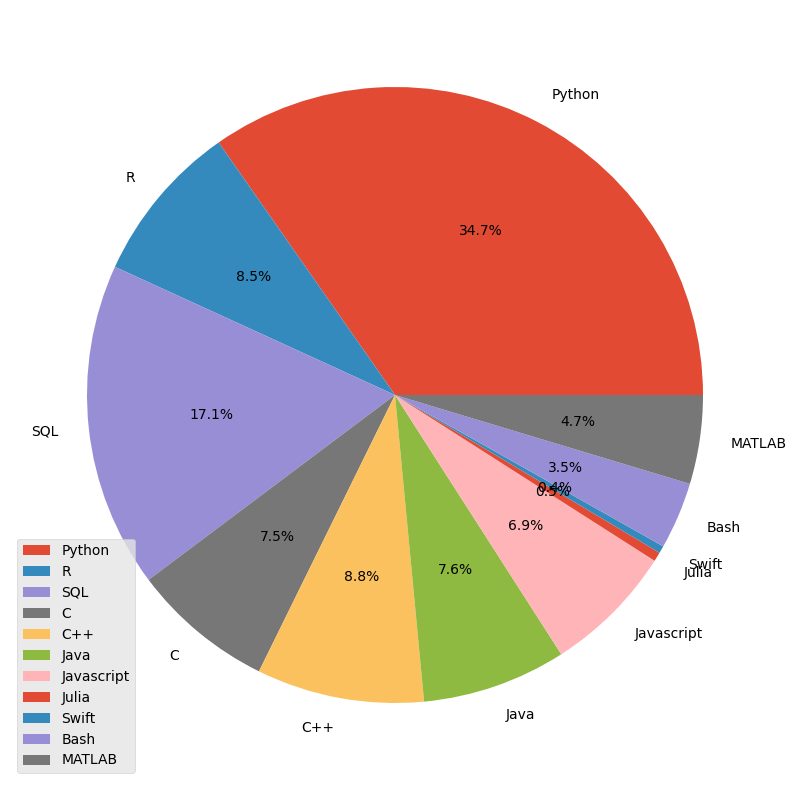

In [64]:
plt.figure(figsize=(10,10))
plt.pie(q7_series ,labels = q7_series.index  ,autopct="%1.1f%%")
plt.legend()
plt.show()

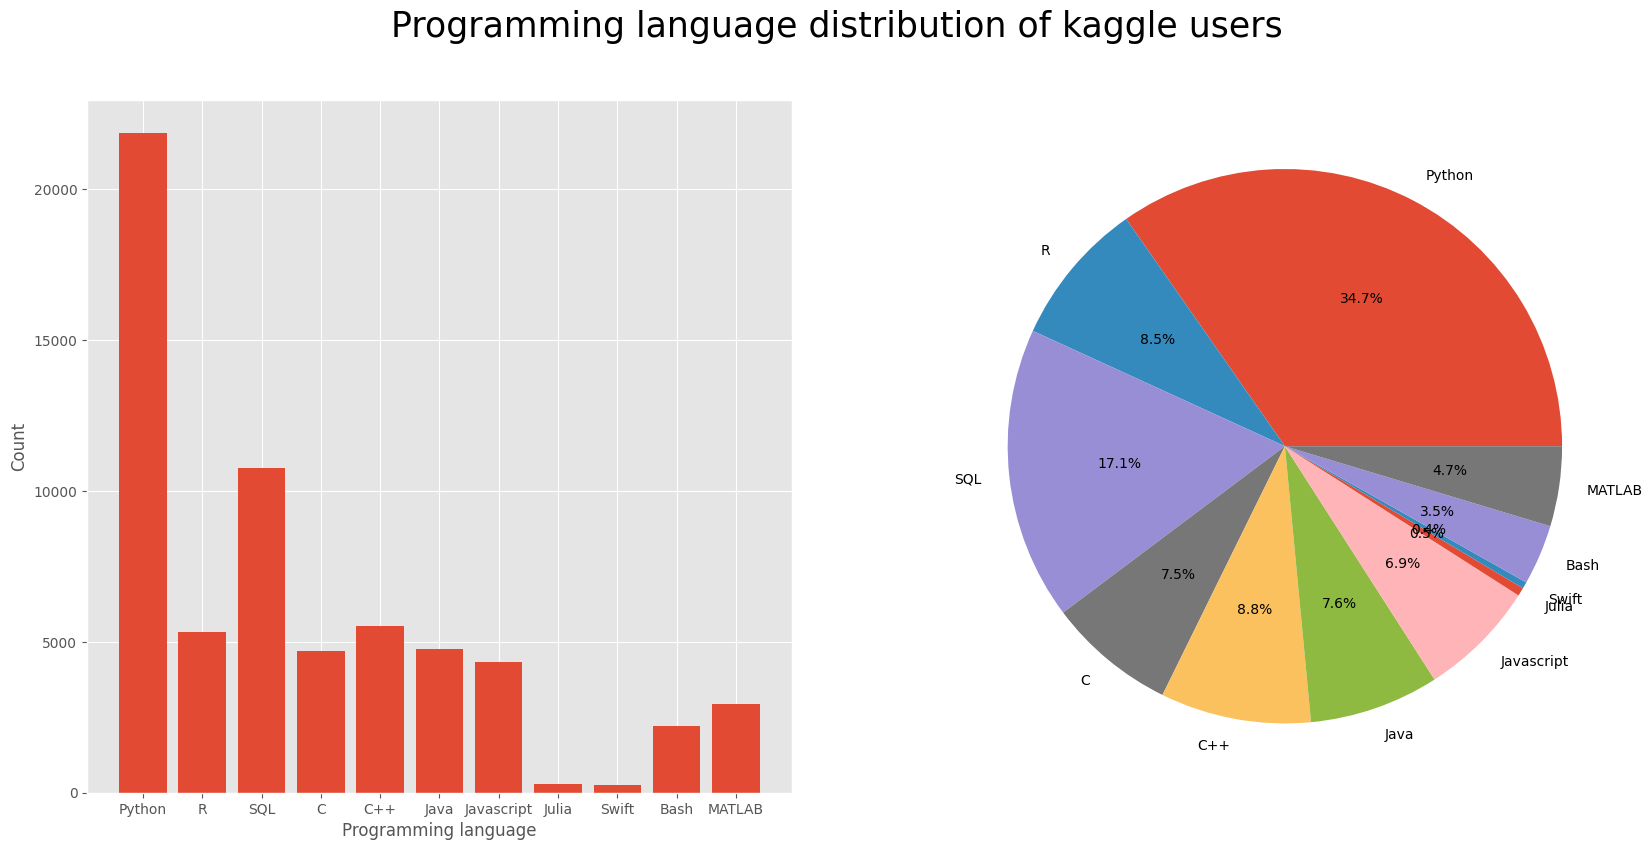

In [65]:
fig , axes = plt.subplots(1,2 , figsize=(20,9))
axes[0].bar(q7_series.index , q7_series.values )
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Programming language')


axes[1].pie(q7_series ,labels = q7_series.index  ,autopct="%1.1f%%")
plt.suptitle('Programming language distribution of kaggle users' ,fontsize = 25)

plt.show()


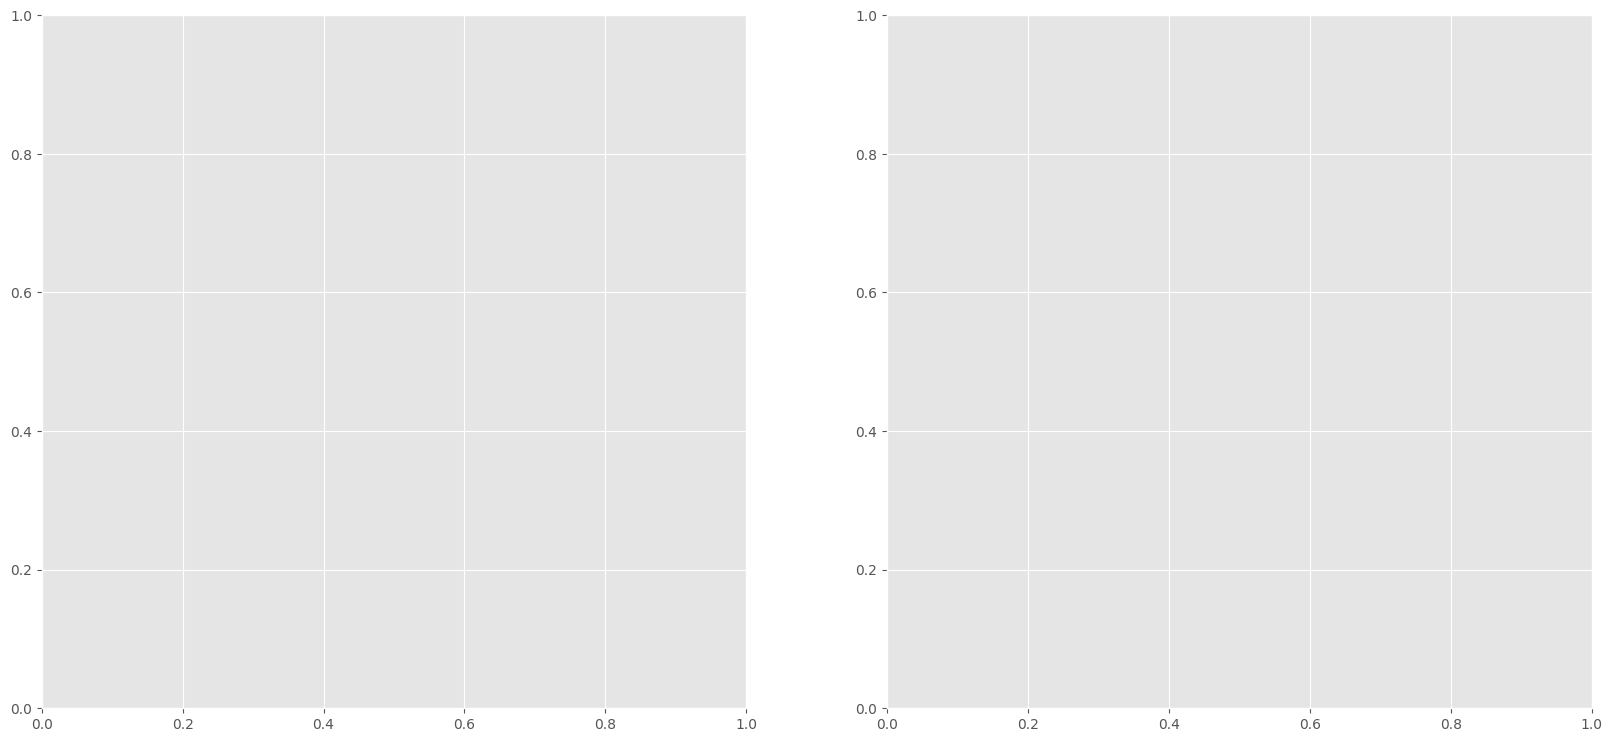